<a href="https://colab.research.google.com/github/ngzhankang/finalYearProjectUOB/blob/main/training/NLP_VDCNN_Multilabel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINAL YEAR PROJECT - VDCNN MULTILABEL
Done by : 
- P1935785 Ang Yak Hng
- P1932964 Teo Swee Hong Winson
- P1935727 Ng Zhan Kang
- P1935488 Triston Loh
- P1935602 Ng Ao Yang

Class of DIT/FT/3A/05


---
---

# Index
1. [Data Importing](#1.-Data-Importing)<br>
    1.1. [Load the libraries](#1.1.-Load-the-libraries)<br>
    1.2. [Check CUDA Version](#1.2.-Check-CUDA-Version)<br>
    1.3. [Load the modules](#1.3.-Load-the-modules)<br>
    1.4. [Load the dataset](#1.4.-Load-the-dataset)
2. [Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)<br>
    2.1. [Get overview of dataset](#2.1.-Get-overview-of-dataset)<br>
    2.2. [Drop unncessary columns](#2.2.-Drop-unncessary-columns)<br>
    2.3. [Filter rows with valid data](#2.3.-Filter-rows-with-valid-data)<br>
    2.4. [Get graphical overview of dataset](#2.4.-Get-graphical-overview-of-dataset)<br>
    2.5. [See examples of company description](#2.5.-See-examples-of-company-description)
3. [Data Preprocessing](#Data-Preprocessing)<br>
    3.1. [Removing \n](#3.1.-Removing-\n)<br>
    3.2. [Calculate the word length distribution](#3.2.-Calculate-the-word-length-distribution)<br>
    3.3. [Populating Nan cells](#3.3.-Populating-Nan-cells)<br>
    3.4. [Assigning tags](#3.4.-Assigning-tags)<br>
    3.5. [Text Tokenization, Removing Stop Words, Punctuations, Numbers and Lower Case](#3.5.-Text-Tokenization,-Removing-Stop-Words,-Punctuations,-Numbers-and-Lower-Case)<br>
    3.6. [Char2Vec](#3.6.-Char2Vec)
4. [BERT Model](#BERT-model)<br>
    4.1. [Training Models](#4.1.-Training-Models)<br>
    4.2. [Evaluating Models](#4.2.-Evaluating-Models)
5. [Saving Model](#Saving-Model)<br>
    5.1. [Using `model.save`](#5.1.-Using-`model.save`)
6. [References](#References)

---
---

# 1. Data Importing

### 1.1. Load the libraries

---

Load the necessary libraries for usage in the entire project.

In [ ]:
! nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


### 1.2. Check CUDA Version

---

We need to check the cuda version to download the correct version of spaCy for this application.

In [ ]:
# suppress future warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# install necessary libraries that might not be found
!pip install -U spacy --quiet 
!python -m spacy validate
!pip install -U pip setuptools wheel --quiet 
!pip install -U spacy[cuda110,transformers,lookups] --quiet 
!python -m spacy download en_core_web_lg
!pip install tensorflow_addons --quiet 

# check versions of libraries we are going to use
%tensorflow_version 2.x
import os
import tensorflow
import tensorflow_addons as tfa
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import spacy
import platform

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Tensorflow version={}".format(tensorflow.__version__))
print("Tensorflow_addons version={}".format(tfa.__version__))
print("Keras version={}".format(tensorflow.keras.__version__))
print("Sklearn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Seaborn version={}".format(sns.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("SpaCy version={}".format(spacy.__version__))
print("Python version={}".format(platform.python_version()))

     |████████████████████████████████| 6.4 MB 4.5 MB/s 
     |████████████████████████████████| 456 kB 51.4 MB/s 
     |████████████████████████████████| 621 kB 47.0 MB/s 
     |████████████████████████████████| 10.1 MB 37.7 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
2021-08-11 11:57:58.460467: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
✔ Loaded compatibility table

================= Installed pipeline packages (spaCy v3.1.1) =================
ℹ spaCy installation: /usr/local/lib/python3.7/dist-packages/spacy

No pipeline packages found in your current environment.

     |████████████████████████████████| 1.6 MB 3.9 MB/s 
     |████████████████████████████████| 819 kB 18.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1,

### 1.3. Load the modules

---

Load the necessary modules for usage in the entire project.

In [ ]:
# importing necessary modules for this project
import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
import spacy

# activate the GPU to run spaCy with GPU
spacy.prefer_gpu()

%matplotlib inline

### 1.4. Load the dataset

---

Load the dataset for usage in the entire project.

In [ ]:
# use pandas to read the excel file and populate it in a pandas dataframe
companies = pd.read_excel('./clean_dataset.xlsx')

# see the top 10 companies that are populated in the dataframe
companies.head(10)

,Company_ID,Company,Country,PIC,Sector,Subsector,Archetype,Valuechain,Websites,Company Profile Information,Remarks
0,4137190062363536,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,NaN,TMT,media,media_aggregator/distributor,Midstream,https://getlinks.co/6831,For over 80 years of experience in creating an...,NaN
1,23248790229909752,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,NaN,TMT,consumer electronics,consumer electronics_distributor,Downstream,https://baike.baidu.com/item/%E4%B8%9C%E8%8E%9...,Yatai's main products cover various cleaning m...,NaN
2,28486505934571008,EXIS TECH SDN. BHD.,MALAYSIA,NaN,oos,others,others,NaN,http://www.exis-tech.com/,"In the beginning, it started off by providing ...",NaN
3,38251695094669872,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,39910921263510784,Aztech Electronics Pte Ltd,SINGAPORE,NaN,TMT,consumer electronics,consumer electronics_distributor,Downstream,https://www.aztech.com/business/about-us/,"Being a turnkey, one-stop integrated solutions...",NaN
5,54863889264716592,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,NaN,tmt,it_services,it_services,midstream,https://www.tongdun.net/info/company,Tongdun Technology is a professional third-par...,NaN
6,60624700618157752,EMASTIGA ENGRG PTE LTD,SINGAPORE,NaN,cni,cni_service providers,cni_service providers,midstream,http://emastiga.com/,"For over 30 years, EMASTIGA has been servicing...",Holding company and also provides it_services....
7,102285011598298000,"AEROFLUID CO.,LTD.",THAILAND,NaN,CNI,cni_equipment suppliers,cni_equipment suppliers,MIDSTREAM,https://www.matchlink.asia/business/page/Thail...,Sales of hydraulic equipment and parts,NaN
8,120313950904532608,EXCELKOS SDN. BHD.,MALAYSIA,NaN,IND,diversified,rubber,Manufacturer,https://www.excelkos.com/,"For Excelkos, it all started with a far-sighte...",NaN
9,125319506467804896,KUM ENG HUAT ELECTRIC CO PTE LTD,SINGAPORE,NaN,tmt,consumer electronics,consumer electronics_distributor,downstream,https://kumenghuat.com.sg/pages/about,Kum Eng Huat is the authorised dealer for Osra...,NaN


---
---

# 2. Exploratory Data Analysis

### 2.1. Get overview of dataset

---

Get statistical information of the dataset to understand the dataset better.

In [ ]:
# see the row headers of the entire pandas dataframe first
list(companies.columns)

['Company_ID',
 'Company',
 'Country',
 'PIC',
 'Sector',
 'Subsector',
 'Archetype',
 'Valuechain',
 'Websites',
 'Company Profile Information',
 'Remarks']

In [ ]:
# get the total number of records in the dataframe
df_count = companies['Company_ID'].count()

# get count of unique contries where companies are based in
df_countCountry = companies['Country'].nunique()

# get count of total unique sectors where companies are from
df_countSector = companies['Sector'].nunique()

# get count of total unique subseector where companies are from
df_countsubSector = companies['Subsector'].nunique()

# get count of total unique valuechain where companies are from
df_countValuechain = companies['Valuechain'].nunique()

# get count of total unique archetypes
df_countArchetype = companies['Archetype'].nunique()

print('Total number of records:', df_count)
print('Total number of countries:', df_countCountry)
print('Total number of sectors:', df_countSector)
print('Total number of subsectors:', df_countsubSector)
print('Total number of valuechain:', df_countValuechain)
print('Total number of archetypes:', df_countArchetype)

Total number of records: 9600
Total number of countries: 14
Total number of sectors: 16
Total number of subsectors: 37
Total number of valuechain: 18
Total number of archetypes: 94


In [ ]:
# get total number of countries
df_totalCountries = companies['Country'].value_counts()

# get list of unique sector
df_sector = companies['Sector'].value_counts()

# get list of unique archetype
df_archetype = companies['Archetype'].value_counts()

# get list of unique valuechain
df_valuechain = companies['Valuechain'].value_counts()

print('List of unique countries:\n{}'.format(df_totalCountries))
print()
print('List of unique sector:\n{}'.format(df_sector))
print()
print('List of unique valuechain:\n{}'.format(df_valuechain))

List of unique countries:
SINGAPORE          3459
MALAYSIA           2200
THAILAND           1817
CHINA               971
HONG KONG           577
INDONESIA           552
VIETNAM              12
MYANMAR               3
TAIWAN                2
LABUAN                2
AUSTRALIA             2
UNITED KINGDOM        1
INDONESIANO CIF       1
CANADA                1
Name: Country, dtype: int64

List of unique sector:
OOS           2082
CNI           1744
REH            942
IND            886
CG             862
ONG            667
TMT            637
cni            258
tmt            188
oos             79
ong             66
ind             11
cg               7
reh              6
                 1
auto & mec       1
Name: Sector, dtype: int64

List of unique valuechain:
MIDSTREAM                 1696
Downstream                1221
Midstream                  702
                           659
DOWNSTREAM                 658
midstream                  309
Manufacturer               296
UPSTREAM  

In [ ]:
# get list of unique subsector
df_subsector = companies['Subsector'].value_counts()

print('List of unique Subsector:\n{}'.format(df_subsector))

List of unique Subsector:
others                               2161
building_material                     831
retail n distribution                 560
buildings & industrial                542
auto & mec                            482
petrochemical                         421
consumer electronics                  337
metals and mining                     300
residential                           281
cni_service providers                 279
restaurants, catering & services      270
fmcg                                  186
utilities                             178
it_services                           171
commercial                            146
o&g                                   135
mixed                                 129
o&g_service providers/contractors     123
semiconductor                         117
diversified                           114
infrastructure                        107
telecommunication                      88
hotels and accommodation               88
animal p

In [ ]:
print('List of unique archetype:\n{}'.format(df_archetype))

List of unique archetype:
others                                2161
building_material_manufacturer         573
buildings & industrial_contractor      496
consumer discretionary distributor     358
cni_service providers                  279
                                      ... 
tisp – fiber cable                       2
MIDSTREAM                                2
tisp – tower                             2
metals and mining                        1
building material_manufacturer           1
Name: Archetype, Length: 94, dtype: int64


### 2.2. Drop unncessary columns

---

Here, we will drop columns that wiill not aid in our EDA.

In [ ]:
# declare the list of the row names that are redundant
rows_to_drop = ['Company_ID', 'PIC', 'Websites', 'Remarks']

# use a conditional expression to filter out those rows
df_filteredCompanies = companies.drop(labels=rows_to_drop, axis=1)

df_filteredCompanies

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,For over 80 years of experience in creating an...
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,Yatai's main products cover various cleaning m...
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing ..."
3,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions..."
...,...,...,...,...,...,...,...
9595,SOONBEE INVESTMENT HOLDINGS PTE. LT D,SINGAPORE,OOS,others,others,NaN,SOONBEE INVESTMENT HOLDINGS is an ACRA-registe...
9596,SICHUAN CHINA RAILWAY WENRUI REAL E,CHINA,NaN,NaN,NaN,NaN,NaN
9597,GROUP INDUSTRIES PTE LTD,SINGAPORE,CNI,building_material,building_material_manufacturer,MIDSTREAM,Group Industries Pte Ltd was founded in 1986. ...
9598,"SIAM NISSAN EASTERN CO.,LTD.",THAILAND,IND,auto & mec,auto dealer,Trader,Auto Dealership - Retail


### 2.3. Filter rows with valid data

---

Extract columns with Nan values and list them out here. Afterwards, gather the rows deemed suitable to process NLP.

In [ ]:
# find all the rows with nan data in sector, subsector, archetype and valuechain
cols_to_check = ['Sector', 'Subsector', 'Archetype', 'Valuechain', 'Company Profile Information']
empty = df_filteredCompanies[df_filteredCompanies[cols_to_check].isnull().all(1)]

empty

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
3,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN
12,"CHANGTU COUNTRY LONGXING FERTILIZER CO.,LTD",CHINA,NaN,NaN,NaN,NaN,NaN
28,"ZIBOBOSHANHONGLIWEI MOTOR CO.,LTD",CHINA,NaN,NaN,NaN,NaN,NaN
48,"BEIJING DUO MEIDUO SHIYOU PRODUCTS SALES CO., ...",CHINA,NaN,NaN,NaN,NaN,NaN
63,TRUSVEST SDN. BHD.,MALAYSIA,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9576,REAL CHARM INVESTMENT LIMITED,HONG KONG,NaN,NaN,NaN,NaN,NaN
9585,JIJIN INTERNATIONAL TRADE (SHANGHAI),CHINA,NaN,NaN,NaN,NaN,NaN
9592,"QITAI TIANSHAN CEMENT CO., LTD",CHINA,NaN,NaN,NaN,NaN,NaN
9596,SICHUAN CHINA RAILWAY WENRUI REAL E,CHINA,NaN,NaN,NaN,NaN,NaN


In [ ]:
# now we get the dataset that are valid
df_valid = pd.concat([df_filteredCompanies, empty, empty]).drop_duplicates(keep=False)

df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,For over 80 years of experience in creating an...
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,Yatai's main products cover various cleaning m...
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing ..."
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions..."
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,Tongdun Technology is a professional third-par...
...,...,...,...,...,...,...,...
9593,BANGKOK PATANA SCHOOL,THAILAND,CG,retail n distribution,consumer discretionary distributor,Downstream,Bangkok Patana School is Thailand’s original B...
9594,INDRATI LINES PTE LTD,SINGAPORE,OOS,others,others,NaN,Indra is one of the leading global technology ...
9595,SOONBEE INVESTMENT HOLDINGS PTE. LT D,SINGAPORE,OOS,others,others,NaN,SOONBEE INVESTMENT HOLDINGS is an ACRA-registe...
9597,GROUP INDUSTRIES PTE LTD,SINGAPORE,CNI,building_material,building_material_manufacturer,MIDSTREAM,Group Industries Pte Ltd was founded in 1986. ...


In [ ]:
# now we check the count of the total filtered dataset again
df_filterCount = df_valid['Company'].count()

print('Total number of filtered records:', df_filterCount)

Total number of filtered records: 8447


### 2.4. Get graphical overview of dataset

---

Get visualised information of the dataset to understand the dataset better.

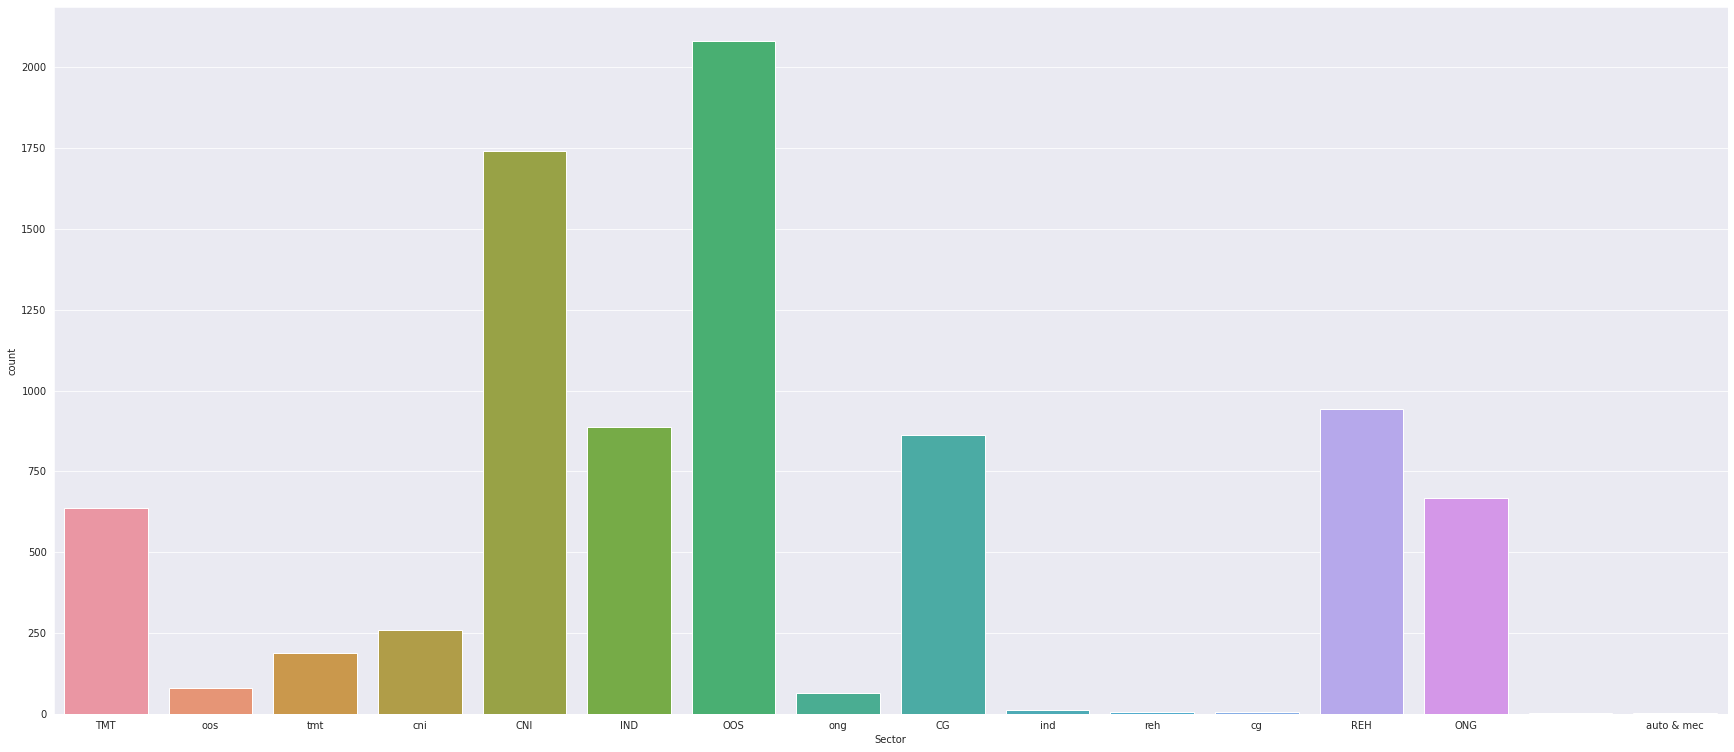

In [ ]:
sns.set_style('darkgrid')
plt_dims = (30, 13)
fig, ax = plt.subplots(figsize=plt_dims)

# plot a barplot to see number of companies that belongs to specific sectors
sns.countplot(x="Sector", data=df_valid, ax=ax)
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We see that most of the companies comes from the OOS(Others), CNI(Construction And Infrastructure) and REH (Retail And Hospitality).
</div>

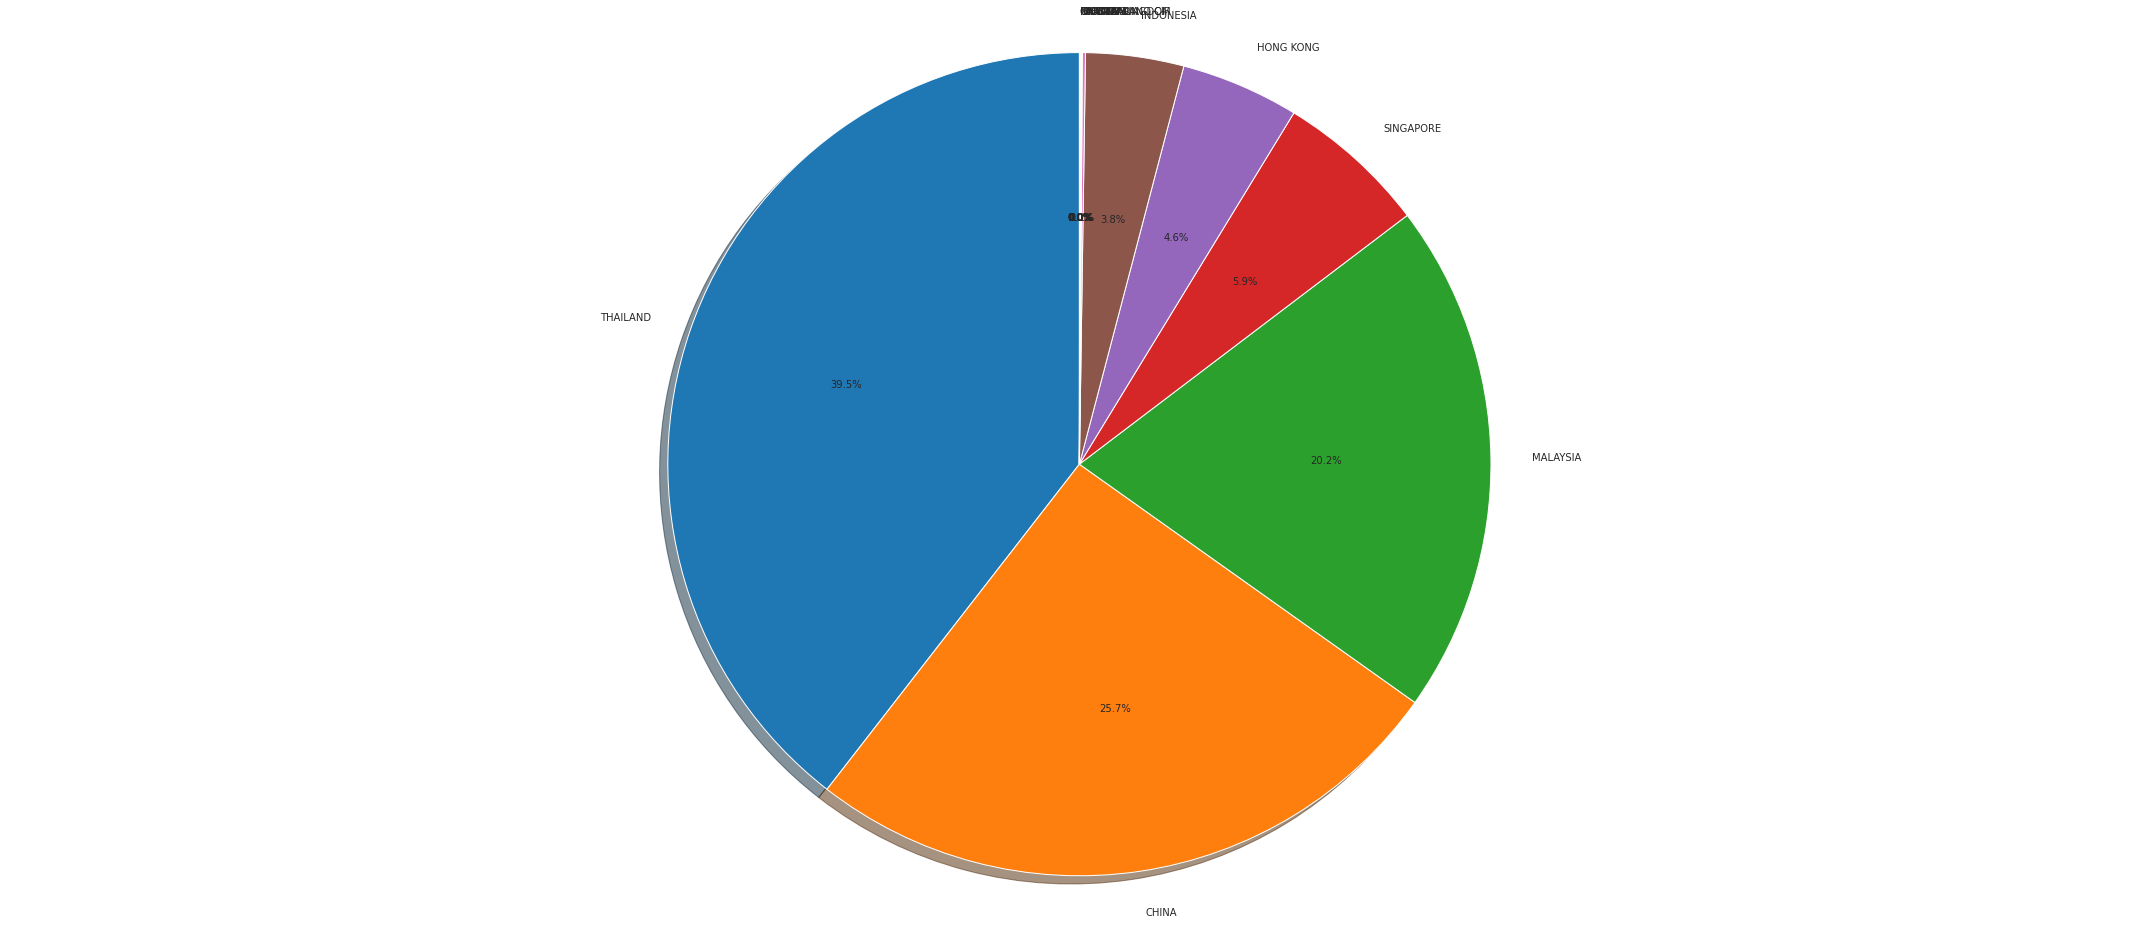

In [ ]:
# Pie chart
labels = list(df_valid['Country'].unique())
sizes = list(df_valid['Country'].value_counts())

plt_dims = (30, 13)
fig1, ax1 = plt.subplots(figsize=plt_dims)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We see that most of the companies are Thailand-Based companies, followed up by China, Malaysia and so on.

### 2.5. See examples of company description

---

We would now like to see some examples of the company descriptions in order to undestand later how to preprocess them later on.

In [ ]:
# configurate pandas dataframe to let us see the entire company description IN FULL
pd.set_option('display.max_colwidth', None)

# get the 1st 50 results and observe
df_valid.loc[0:49,'Company Profile Information']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We do realise that some of the company profile message have some breaks in between like '\n'. Now, we will have to take away all these problems so that it is one string of paragraph with no such annotations in betweeen.
</div>

---
---

# 3. Data Preprocessing

### 3.1. Removing `\n`

---

Now, we will like to standardize all the paragraphs such that the are homogenous, before we tokenize the paragraph.

In [ ]:
# get rid of the \n found in the respective descriptions
df_valid = df_valid.replace('\n',' ', regex=True)

### 3.2. Calculating the word length distribution

---

Here, we will be calculating the world length distribution of the collective company description.

In [ ]:
# first, add in a new column that tabluates the length of the respecive company description
df_valid["length"] = df_valid["Company Profile Information"].str.len()
df_valid.head()

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238.0
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273.0
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344.0
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524.0
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",593.0


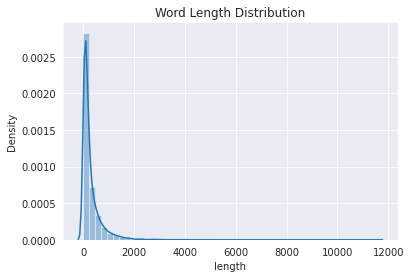

In [ ]:
# now plot a distribution plot to see the word length distribution
sns.distplot(df_valid["length"], kde=True)
plt.title('Word Length Distribution')
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We can see that there is a high record of the company description having a total word length of around less than 1000 words.
</div>

### 3.3. Populating Nan cells

---

We will now have to populate Nan cells with space so that we can carry on and process with text tokenization.

In [ ]:
# fill na with space instead of others
df_valid.fillna(" " ,inplace=True)
df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",593
...,...,...,...,...,...,...,...,...
9593,BANGKOK PATANA SCHOOL,THAILAND,CG,retail n distribution,consumer discretionary distributor,Downstream,"Bangkok Patana School is Thailand’s original British international school for students from 2 to 18 years. Our not-for-profit school has remained at the forefront of education in Thailand and is today one of the most respected educational establishments in South East Asia. We provide learning from Foundation Stage right through to Senior Studies, for over 2,200 students from around 60 countries. The School follows a modified English National curriculum up to Year 11 and the International Baccalaureate in Years 12 and 13. Bangkok Patana School is committed to nurturing lifelong learners who can adapt to an ever-changing world. Our goal is to give your children the best intellectual, physical and social preparation for their futures.",741
9594,INDRATI LINES PTE LTD,SINGAPORE,OOS,others,others,,"Indra is one of the leading global technology and consulting companies and the technological partner for core business operations of its customers world-wide. It is a world-leader in providing proprietary solutions in specific segments in Transport and Defense markets, and a leading firm in Digital Transformation Consultancy and Information Technologies in Spain and Latin America through its affiliate Minsait Its business model is based on a comprehensive range of proprietary products, with a high-v

### 3.4. Assigning tags
---
In this section, we will be assigning tags to every row, so that we can make use of the given keywords for bag-of-words (BoW) processing.

In [ ]:
# Programmatically assign tags to each definition
sector_keywords = pd.read_excel('./sector_master_definition.xlsx')
df_keywords = sector_keywords[['Sector', 'Subsector', 'Archetype', 'Value Chain', 'Sector Keywords']]

# capitalise all tags
df_keywords['Value Chain'] = df_keywords['Value Chain'].str.upper()
df_keywords.fillna(' ', inplace=True)
df_keywords['Sector Keywords'] = df_keywords['Sector Keywords'].str.upper()
df_keywords['Sector Keywords'].replace(' ', '[]', inplace=True)

# save unique tags, sorted for consistency across runs
sector = np.sort(df_keywords['Sector'].unique())
subsector = np.sort(df_keywords['Subsector'].unique())
archetype = np.sort(df_keywords['Archetype'].unique())
valuechain = np.sort(df_keywords['Value Chain'].unique())
print(len(sector), len(subsector), len(archetype), len(valuechain))
tag_counts = [len(sector), len(subsector), len(archetype), len(valuechain)]

# assign number tag list to each row
taglist = []
for index, row in df_keywords.iterrows():
    temp = []

    temp.append(np.where(sector == row['Sector'])[0][0])
    temp.append(np.where(subsector == row['Subsector'])[0][0])
    temp.append(np.where(archetype == row['Archetype'])[0][0])
    temp.append(np.where(valuechain == row['Value Chain'])[0][0])

    taglist.append(temp)

# assign completed taglist to column in dataframe
df_keywords['list_tag'] = taglist

7 32 92 9


In [ ]:
# process data for homogenity
df_valid['Valuechain'] = df_valid['Valuechain'].str.split().str.join(' ')
df_valid['Valuechain'] = df_valid['Valuechain'].str.upper()
df_valid['Sector'] = df_valid['Sector'].str.upper()
df_valid['Valuechain'].replace('', ' ', inplace=True)

taglist_df = []
# process tags for records
for index, row in df_valid.iterrows():
    temp = []

    try: # for error handling
        temp.append(np.where(sector == row['Sector'])[0][0])
        temp.append(np.where(subsector == row['Subsector'])[0][0])
        temp.append(np.where(archetype == row['Archetype'])[0][0])
        temp.append(np.where(valuechain == row['Valuechain'])[0][0])

        taglist_df.append(temp)
    except:
        # drop data if not valid
        df_valid.drop(index, inplace=True)


df_valid['list_tag'] = taglist_df

df_valid.shape

(8423, 9)

In [ ]:
# combine all keywords from all sectors
keywords_masterlist = []
for index, row in df_keywords.iterrows():
    keywords_masterlist += eval(row['Sector Keywords'])

# remove extraenous keywords, then sort
keywords_masterlist = sorted(list(set(keywords_masterlist)))
print(len(keywords_masterlist))

1481


### 3.5. Text Tokenization, Removing Stop Words, Punctuations, Numbers and Lower Case

---

Now we will start to tokenize the word after we have ensure that the text description between the company descriptions are homogenous. In this process, we will also process with stop words, punctuations, numeric figures, lower cap words and lemmatize words all using the spaCy API.

In [ ]:
# we will have to ensure all the dtype of the respective columns are in string and not float for spacy to handle properly, so now we will attempt to convert all into strings
columns_to_convert = ['Sector', 'Subsector', 'Archetype', 'Valuechain', 'Company Profile Information']

for i in columns_to_convert:
  df_valid[i] = df_valid[i].astype(str)

Here we will do everything necessary to start up spacy for use in preprocessing the text.

In [ ]:
# import required libraries 
from spacy.language import Language
from spacy.tokens import Doc
from spacy.lang.char_classes import ALPHA, ALPHA_LOWER, ALPHA_UPPER, CONCAT_QUOTES, LIST_ELLIPSES, LIST_ICONS
from spacy.util import compile_infix_regex

# initialise nlp engine
nlp = spacy.load("en_core_web_lg")

# declare custom properties
Doc.set_extension('processed', default=True, force=True)

# Modify tokenizer infix patterns
infixes = (
    LIST_ELLIPSES
    + LIST_ICONS
    + [
        r"(?<=[0-9])[+\-\*^](?=[0-9-])",
        r"(?<=[{al}{q}])\.(?=[{au}{q}])".format(
            al=ALPHA_LOWER, au=ALPHA_UPPER, q=CONCAT_QUOTES
        ),
        r"(?<=[{a}]),(?=[{a}])".format(a=ALPHA),
        r"(?<=[{a}0-9])[:<>=/](?=[{a}])".format(a=ALPHA),
    ]
)

infix_re = compile_infix_regex(infixes)
nlp.tokenizer.infix_finditer = infix_re.finditer

# custom retokenizer
@Language.component('custom_retokenizer')
def custom_retoken(doc):
    doc_text = doc.text.upper()
    doc_split = [i.text.upper() for i in doc]
    temp_kw = [i.lstrip().rstrip() for i in keywords_masterlist if len(i.lstrip().rstrip().split(' ')) > 1]
    for token in temp_kw:
        token_length = len(token.split(' '))
        token_split = token.split(' ')
        if token in doc_text and token_split[0] in doc_split:
            merge_pos = doc_split.index(token_split[0])
            with doc.retokenize() as retokenizer:
                try:
                    retokenizer.merge(doc[merge_pos:merge_pos + token_length], attrs={'LEMMA' : token.lower()})
                except:
                    print(merge_pos, merge_pos+token_length)

    return doc

# custom lemmatizer
@Language.component("custom_preprocess")
def custom_preprocess(doc):
    temp = []
    # filter through each token and add to preprocessed text if requirements met.
    for t in doc:
        if (not t.is_punct and not t.like_num and not t.is_stop and not t.is_digit and not (t.ent_type == 396 or t.ent_type == 397)):
            temp.append(t.lemma_.lower())

    temp = ' '.join(temp)
    doc._.processed = temp

    return doc

# add custom pipeline components to default pipeline
nlp.add_pipe('custom_retokenizer')
nlp.add_pipe('custom_preprocess', last=True)

<function __main__.custom_preprocess>

In [ ]:
# run the pipeline on data
processed_doc = list(nlp.pipe(df_valid['Company Profile Information']))

3 5
95 97
3 5
4 6
6 8


In [ ]:
# get a view of the entity visualizer
from spacy import displacy
displacy.render(processed_doc[4], style="ent", jupyter=True)

In [ ]:
# add lemmatised words to dataframe
df_valid['processed'] = [doc._.processed for doc in processed_doc]

df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length,list_tag,processed
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,MIDSTREAM,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238,"[6, 18, 49, 5]",year experience create develop high-quality learning material enable provide world-class educational innovation meet need teacher student institution educational authority
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273,"[6, 8, 20, 3]",yatai main product cover cleaning machinery clean agent clean tool stone maintenance cleaning product clean solution service include product technical consultation product customization employee training maintenance
2,EXIS TECH SDN. BHD.,MALAYSIA,OOS,others,others,,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344,"[4, 24, 64, 0]",beginning start provide technical support test handler move module design production in-house design full-fledged handler introduce company design produce wide range turret pick-and-place solution customer world
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524,"[6, 8, 20, 3]",turnkey one-stop integrate solution provider base singapore aztech equip state-of-the-art equipment r&d design manufacturing packaging capability deliver seamless unified experience time strive edge technology year build capability serve client manufacturing need include consumer electronics telecommunication healthtech lead lighting automotive technology start-up market segment
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,TMT,it_services,it_services,MIDSTREAM,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",593,"[6, 17, 46, 5]",tongdun technology professional third-party intelligent risk management decision-making service provider headquarter hangzhou zhejiang integrate artificial intelligence business scenario tongdun technology offer solution intelligent user analysis intelligent risk management intelligent antifraud intelligent operation client industry include financial industry intern

### 3.6. Char2Vec

---

Here, we will use character embedding, as VDCNN is a character-based intern.

In [ ]:
# randomise dataset first here
df_rand = df_valid.sample(frac=1)

In [ ]:
df_rand.head(3)

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length,list_tag,processed
6720,"NANNING TENGNING COMMERICAL CONCRETE CO.,LTD.",CHINA,CNI,building_material,building_material_manufacturer,MIDSTREAM,"Nanning Tengning Commercial Concrete Co., Ltd. was registered and established in Nanning Administration for Industry and Commerce on November 5, 2002. Legal representative Li Zelong, the company's business scope includes the production and sales of commercial concrete; road cargo transportation (operating with permits, and specific projects subject to approval by the approval department), etc.",396,"[1, 3, 8, 5]",nanning tengning commercial concrete co. ltd. register establish nanning administration industry commerce november legal representative li zelong company business scope include production sale commercial concrete road cargo transportation operate permit specific project subject approval approval department etc
3028,"ISUZU CHAICHAROENKIJ MOTORS CO., LTD.",THAILAND,IND,auto & mec,auto component dealer,MIDSTREAM,"suzu Chaicharoenkit Motors Company Limited is one of the Thai Rung Group. It was established in 1993 on an area of ​​7 rai on Petchkasem Road. Bangkok and open business as Official on October 14, 2537 as a full service provider in the field of sales. Along with a standardized maintenance service center And was officially appointed by Tri Petch Isuzu Sales Co., Ltd. as the first showroom in Thailand to receive ISO 9001: 2008 certification from UNITED REGISTRAR OF SYSTEMS THAILAND LIMITED (URS) for quality sales and maintenance services. And is currently certified to the latest ISO 9001: 2015 standard as well.",615,"[2, 2, 4, 5]",suzu chaicharoenkit motors company limited thai rung group establish area ​​7 rai petchkasem road bangkok open business official october service provider field sale standardized maintenance service center officially appoint tri petch isuzu sales co. ltd. showroom thailand receive iso certification united registrar systems thailand limit urs quality sale maintenance service currently certify late iso standard
3497,BEC-TERO SCENARIO COMPANY LIMITED,THAILAND,REH,"restaurants, catering & services","restaurants, catering & services_operators",DOWNSTREAM,Organizes musical performances on stage both domestically and internationally. Business category: entertainment activities.,123,"[5, 27, 78, 3]",organize musical performance stage domestically internationally business category entertainment activity


In [ ]:
ALPHABET = 'abcdefghijklmnopqrstuvwxyz0123456789-,;.!?:’"/|_#$%ˆ&*˜‘+=<>()[]{} '
FEATURE_LEN = 1024 #maxlen as depicted in the papers

In [ ]:
def get_char_dict():
    char_dict={}
    for i,c in enumerate(ALPHABET):
        char_dict[c]=i+1
    return char_dict

def char2vec(text, max_length=FEATURE_LEN):
    char_dict = get_char_dict()
    data=np.zeros(max_length)
    
    for i in range(0, len(text)):
        if i >= max_length:
            return data
        
        elif text[i] in char_dict:
            data[i] = char_dict[text[i]]
        
        else:
            data[i]=len(ALPHABET)

    return data

In [ ]:
char2vec_vectors = []

for text in df_rand["processed"].fillna("NA").values:
  char2vec_vectors.append(char2vec(text))
data = np.array(char2vec_vectors)

In [ ]:
data.shape

(8423, 1024)

In [ ]:
# char2vec in np array form
data

array([[14.,  1., 14., ...,  0.,  0.,  0.],
       [19., 21., 26., ...,  0.,  0.,  0.],
       [15., 18.,  7., ...,  0.,  0.,  0.],
       ...,
       [ 3., 15., 13., ...,  0.,  0.,  0.],
       [16., 20., 67., ...,  0.,  0.,  0.],
       [ 6.,  9., 18., ...,  0.,  0.,  0.]])

In [ ]:
# import validation dataset
df_test = pd.read_excel('./val_dataset.xlsx')
df_test.replace('NAN', np.NaN, inplace=True)

# drop unnecessary columns
df_test.drop(rows_to_drop, axis=1, inplace=True)

# replace newline characters in validation data
df_test = df_test = df_test.replace('\n', ' ', regex=True)

# fill in NAN values in validation data
df_test.fillna(' ', inplace=True)

# change dtype of validation data columns
for i in columns_to_convert:
    df_valid[i] = df_valid[i].astype(str)
    
# process validation dataset
df_test['Valuechain'] = df_test['Valuechain'].str.split().str.join(' ')
df_test['Valuechain'] = df_test['Valuechain'].str.upper()
df_test['Sector'] = df_test['Sector'].str.upper()
df_test['Valuechain'].replace('', ' ', inplace=True)

# add tags to validation data
taglist_df = []
# process tags for records
for index, row in df_test.iterrows():
    temp = []

    try: # for error handling
        temp.append(np.where(sector == row['Sector'])[0][0])
        temp.append(np.where(subsector == row['Subsector'])[0][0])
        temp.append(np.where(archetype == row['Archetype'])[0][0])
        temp.append(np.where(valuechain == row['Valuechain'])[0][0])

        taglist_df.append(temp)
    except Exception as e:
        # drop data if not valid
        print(row.name, e, '\n')
        df_test.drop(index, inplace=True)

df_test['list_tag'] = taglist_df

# run spacy on validation data
evaluate_doc = list(nlp.pipe(df_test['Company Profile Information']))

# add spacy processed words and vectors to validation dataframe
df_test['processed'] = [doc._.processed for doc in evaluate_doc]
df_test['tok2vec_vectors'] = [doc.vector for doc in evaluate_doc]

# randomise dataset first here
df_rand_test = df_test.sample(frac=1)

ALPHABET = 'abcdefghijklmnopqrstuvwxyz0123456789-,;.!?:’"/|_#$%ˆ&*˜‘+=<>()[]{} '
FEATURE_LEN = 1024 #maxlen as depicted in the papers

char2vec_vectors = []

for text in df_rand_test["processed"].fillna("NA").values:
  char2vec_vectors.append(char2vec(text))
data_test = np.array(char2vec_vectors)

---
---

# 4. Models
---
Here we will train the model that will help categorize each company.

### 4.1. Training Models

---

We shall commence training.

In [ ]:
import keras

print('--- Version Checking ---')
print("Keras:", keras.__version__)

--- Version Checking ---
Keras: 2.5.0


In [ ]:
# define one hot encode function
def one_hot(arr, n_cat):
    output = []
    for n in arr:
        result = np.zeros(n_cat)
        result[n] = 1

        output.append(result)

    return np.array(output, dtype=int)

In [ ]:
from keras.preprocessing import sequence
# distribution = int(df_rand.shape[0] * 0.9)

# # split datasets to train and test and do a 90%, 10% split
# X_train, X_test = data[:distribution], data[distribution:]
# y_train, y_test = np.array(list(df_rand.iloc[:distribution]['list_tag'])), np.array(list(df_rand_test.iloc[distribution:]['list_tag']))

X_train = sequence.pad_sequences(np.array(list(data)))
y_train = np.array(list(df_rand['list_tag']))

X_test = sequence.pad_sequences(np.array(list(data_test)))
y_test = np.array(list(df_rand_test['list_tag']))

print(f'Train data shape: {X_train.shape}\nTest data shape: {X_test.shape}')

Train data shape: (8423, 1024)
Test data shape: (1400, 1024)


In [ ]:
print(f'Train data labels: {y_train.__len__()}\nTest data labels: {y_test.__len__()}')

Train data labels: 8423
Test data labels: 1400


In [ ]:
# since we are going to make use of multilabel classification, we need to split our data into the respective 4 classes

# names for the respective classes
label_names = ['sector', 'subsector', 'archetype', 'valuechain']

# First output
y1_train = one_hot(y_train[:,0], tag_counts[0])
y1_test =  one_hot(y_test[:,0], tag_counts[0])

# Second output
y2_train = one_hot(y_train[:,1], tag_counts[1])
y2_test =  one_hot(y_test[:,1], tag_counts[1])

# Third output
y3_train = one_hot(y_train[:,2], tag_counts[2])
y3_test =  one_hot(y_test[:,2], tag_counts[2])

# Fourth output
y4_train = one_hot(y_train[:,3], tag_counts[3])
y4_test =  one_hot(y_test[:,3], tag_counts[3])

y_train_multi = [y1_train, y2_train, y3_train, y4_train]
y_test_multi = [y1_test, y2_test, y3_test, y4_test]

# declare how we gonna print the loss for the respective classes
losses = {i : 'binary_crossentropy' for i in label_names}

In [ ]:
# self-defined k max pooling layer (since keras does not offer)
from tensorflow.keras.layers import Flatten, Layer, InputSpec

class KMaxPooling(Layer):
    """
    K-max pooling layer that extracts the k-highest activations from a sequence (2nd dimension).
    TensorFlow backend.
    """
    def __init__(self, k=3, **kwargs):
        super().__init__(**kwargs)
        self.input_spec = InputSpec(ndim=3)
        self.k = k

    def compute_output_shape(self, input_shape):
        return (input_shape[0], (input_shape[2] * self.k))

    def call(self, inputs):

        # swap last two dimensions since top_k will be applied along the last dimension
        shifted_input = tf.transpose(inputs, [0, 2, 1])

        # extract top_k, returns two tensors [values, indices]
        top_k = tf.nn.top_k(shifted_input, k=self.k, sorted=True, name=None)[0]
        # top_k = tf.nn.top_k(shifted_input, k=self.k)[0]

        # return flattened output
        return Flatten()(top_k)

In [ ]:
# convolutional block layer for 64 and 128 neurons
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv1D, Dense, Dropout, MaxPooling1D, GlobalAveragePooling1D, Input, Lambda, Embedding
from tensorflow.keras.layers import ReLU, BatchNormalization, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model

def convolutional_block(input_shape, num_filters):
  model = Sequential()

  # 1st conv layer
  model.add(Conv1D(filters=num_filters, kernel_size=3, strides=1, padding='same', input_shape=input_shape))
  model.add(BatchNormalization())
  model.add(Activation("relu"))

  # 2nd conv layer
  model.add(Conv1D(filters=num_filters, kernel_size=3, strides=1, padding='same'))
  model.add(BatchNormalization())
  model.add(Activation("relu"))

  return model

In [ ]:
# we need to define this function so that we can get the input shape to be fed to the conv blocks
def conv_shape(conv):
  return conv.get_shape().as_list()[1:]

In [ ]:
# we need to get the length of the keywords for a individual list
len(keywords_masterlist)

1481

In [ ]:
from tensorflow.keras.layers import ReLU

def multi_branch(x, name, output_dim):
  
  # 1st layer temp conv(64)
  x = Conv1D(filters=64, kernel_size=3, strides=2, padding='same')(x)
  
  # 2nd + 3rd layer convblock(64) * 2
  x = convolutional_block(conv_shape(x), num_filters[0])(x)
  x = convolutional_block(conv_shape(x), num_filters[0])(x)

  # 4th layer pool/2
  x = MaxPooling1D(pool_size=3, strides=2, padding='same')(x)

  # 5th + 6th layer convblock(128) * 2
  x = convolutional_block(conv_shape(x), num_filters[1])(x)
  x = convolutional_block(conv_shape(x), num_filters[1])(x)

  # 7th layer pool/21
  x = MaxPooling1D(pool_size=3, strides=2, padding='same')(x)

  # 8th + 9th layer convblock(256) * 2
  x = convolutional_block(conv_shape(x), num_filters[2])(x)
  x = convolutional_block(conv_shape(x), num_filters[2])(x)

  # 10th layer pool/2
  x = MaxPooling1D(pool_size=3, strides=2, padding='same')(x)

  # 11th + 12th layer convblock(512) * 2
  x = convolutional_block(conv_shape(x), num_filters[3])(x)
  x = convolutional_block(conv_shape(x), num_filters[3])(x)

  # k max pooling (k=8)
  k_max = KMaxPooling(k=8)(x)

  # fully connected layers * 2(prev activation relu, softmax is a straight no, sofar best is tanh)
  fc1 = Dense(2048, kernel_initializer='he_normal', activation=ReLU(6))(k_max)
  fc2 = Dense(2048, kernel_initializer='he_normal', activation=ReLU(6))(fc1)

  # output layer(changed softmax to sigmoid)
  output = Dense(output_dim, activation='sigmoid', name=name)(fc2)

  return output

In [ ]:
def create_model(labels, dist_words, input_dim, output_dim):

  # 0th layer lookup table
  inputs = Input(shape=(input_dim, ))
  embedded_seq = Embedding(dist_words, 16, input_length=input_dim)(inputs)

  # attempt to break the labels from here onwards first
  branches = []

  for i in range(len(labels)):
    branches.append(multi_branch(embedded_seq, labels[i], output_dim[i]))

  # fit the entire nn using Keras Model class so that we can print out the model summary
  model = Model(inputs=inputs, outputs=branches, name='company_classification_model')

  return model

In [ ]:
num_filters = [64, 128, 256, 512]

model = create_model(label_names, 69, FEATURE_LEN, tag_counts)

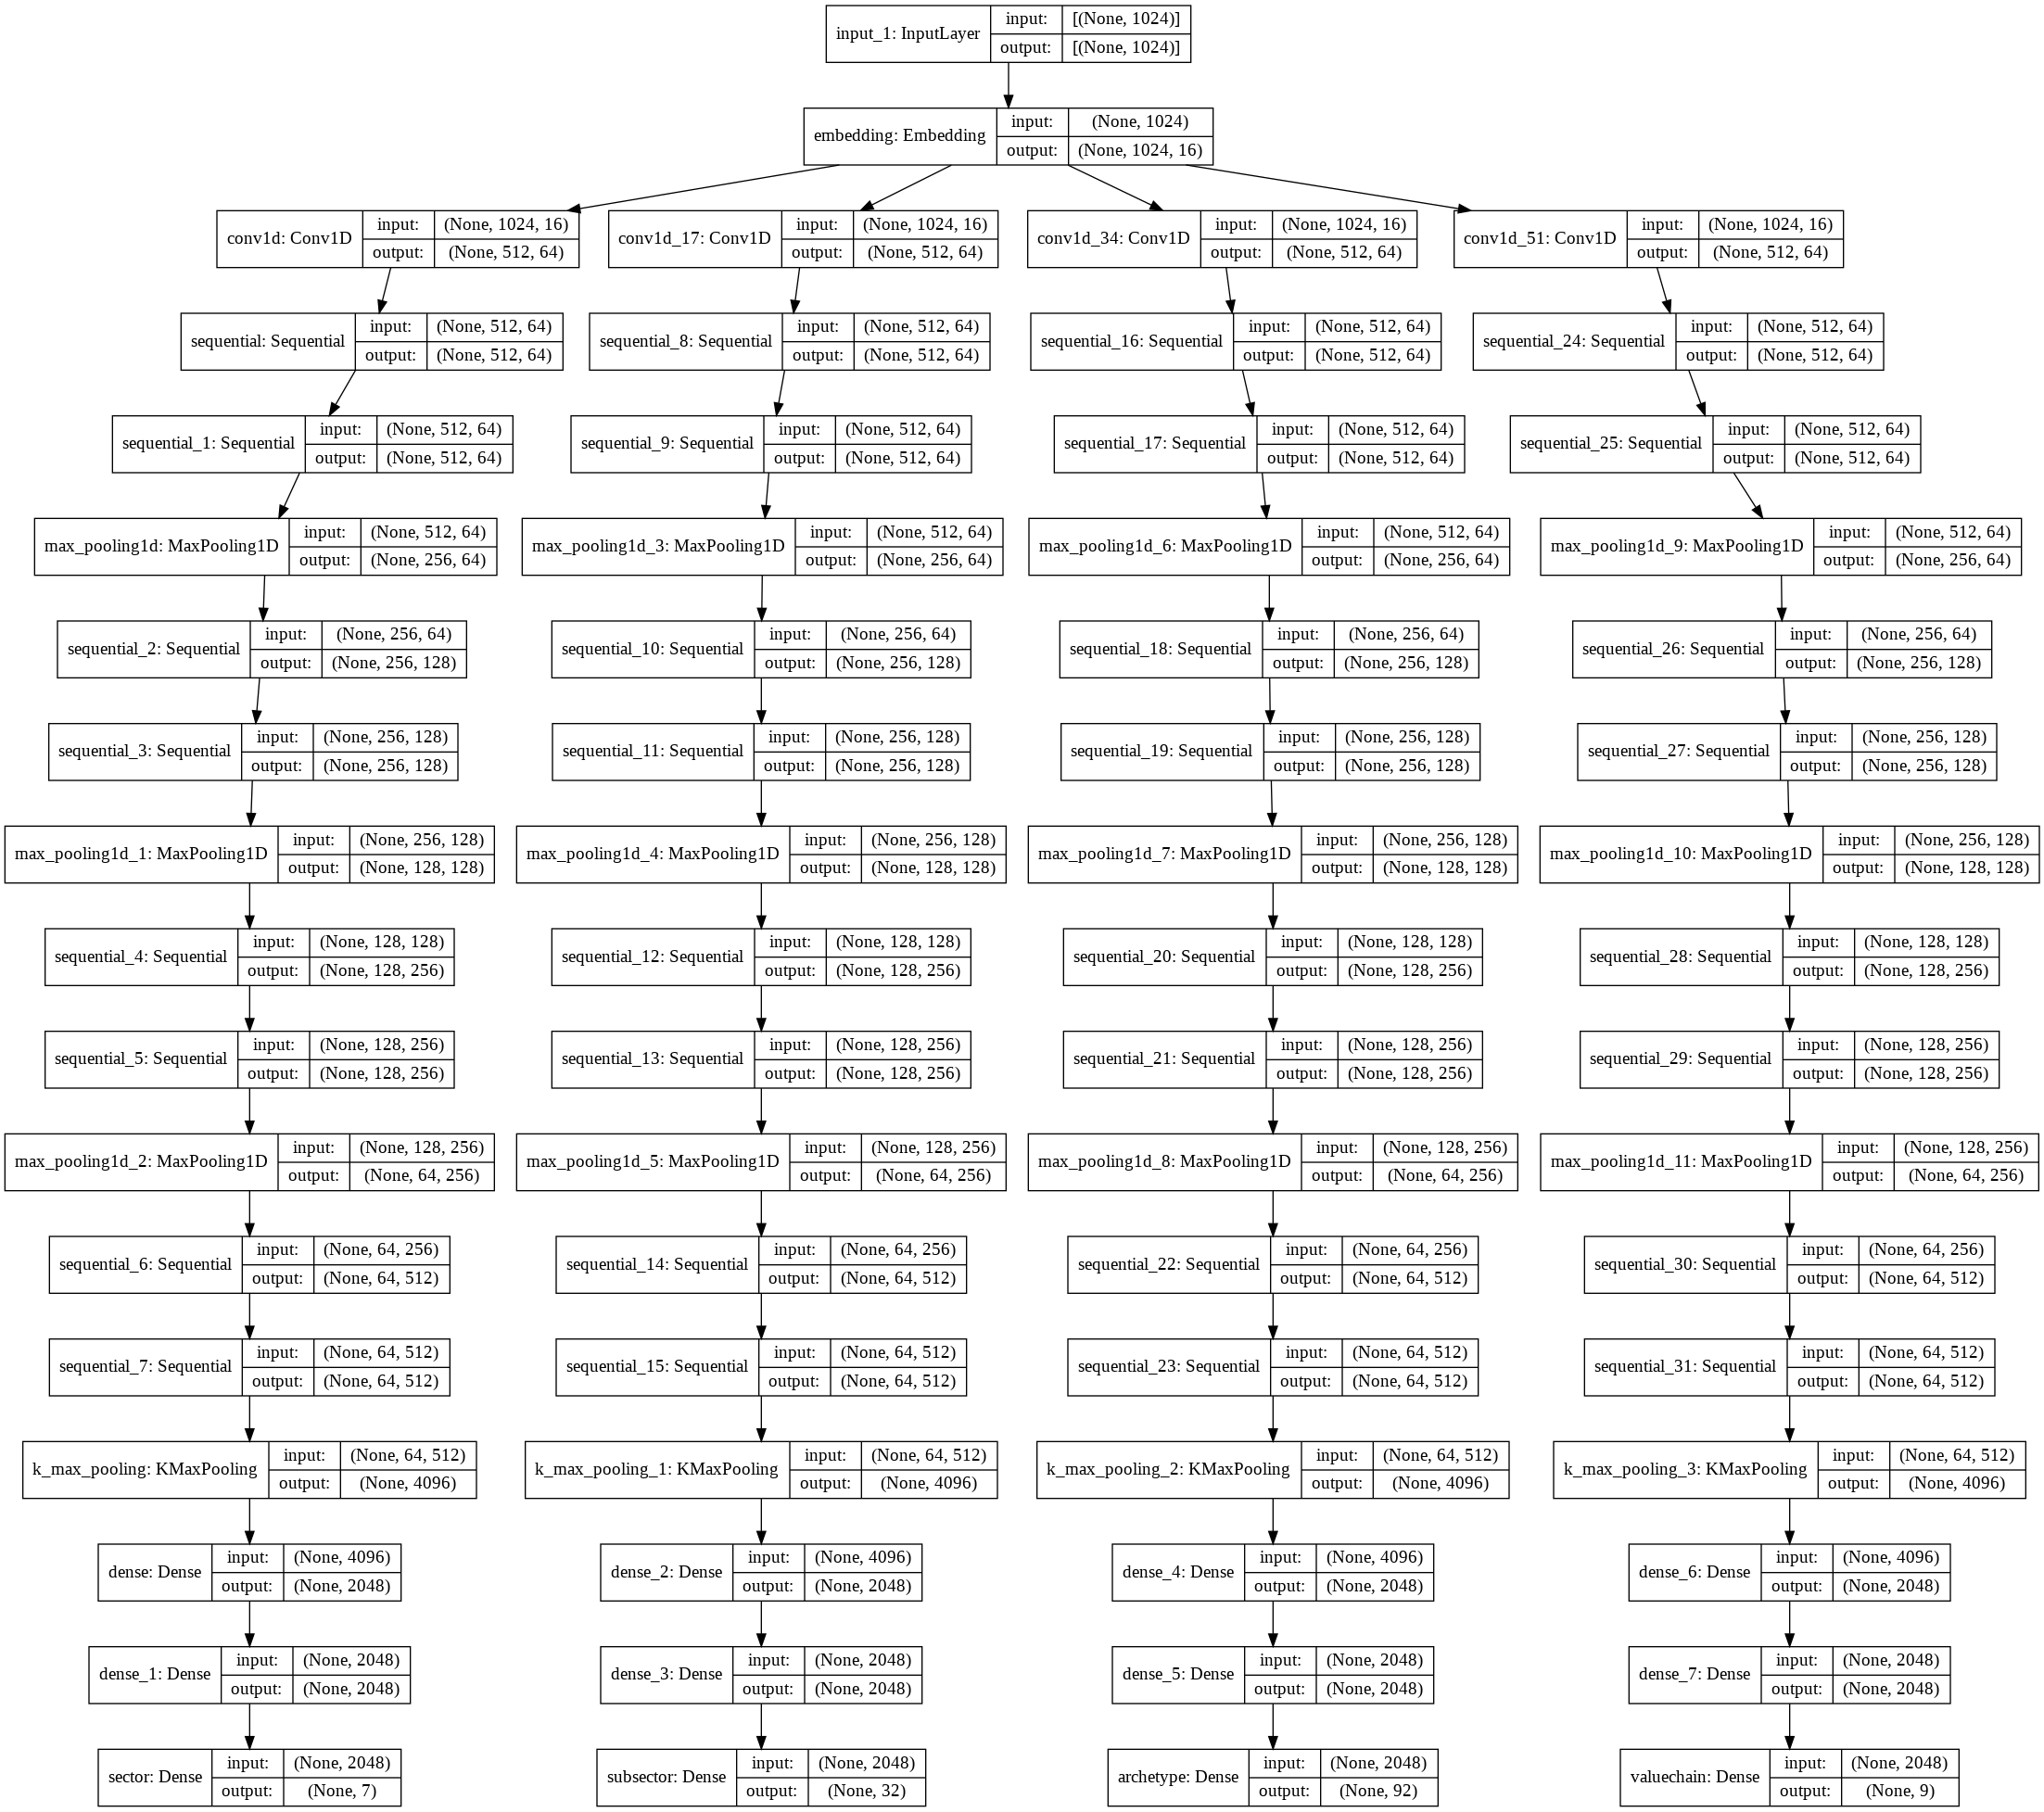

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# now print the summary of the model
model.summary()

Model: "company_classification_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1024)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1024, 16)     1104        input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 512, 64)      3136        embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_17 (Conv1D)              (None, 512, 64)      3136        embedding[0][0]                  
_______________________________________________________________________

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow_addons.metrics import HammingLoss
from timeit import default_timer as timer

# as stated in the paper, they use SGD with lr=0.01, momentum=0.9, weight decay=0.001
opt = SGD(lr=0.01, momentum=0.9, decay=0.001)

# # use earlystopping to prevent model overfitting
# es  = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# model training
model.compile(loss=losses, optimizer=opt, metrics=['accuracy', Precision(), Recall(), AUC(name='auc_precision_recall', num_thresholds=10000), HammingLoss(mode='multilabel', threshold=0.6)])
# history = model.fit(X_train, y_train_multi, validation_split=0.2, epochs=200, batch_size=64, callbacks=[es])
start = timer() 
history = model.fit(X_train, y_train_multi, validation_split=0.2, epochs=100, batch_size=64)
end = timer() 
print("Total time taken for execution: ", end-start, "s")

Epoch 1/100
106/106 [==============================] - 115s 608ms/step - loss: 1.0646 - sector_loss: 0.4767 - subsector_loss: 0.1614 - archetype_loss: 0.0775 - valuechain_loss: 0.3489 - sector_accuracy: 0.2416 - sector_precision: 0.2127 - sector_recall: 0.0304 - sector_auc_precision_recall: 0.6036 - sector_hamming_loss: 0.1500 - subsector_accuracy: 0.2044 - subsector_precision: 0.0816 - subsector_recall: 0.0221 - subsector_auc_precision_recall: 0.7297 - subsector_hamming_loss: 0.0366 - archetype_accuracy: 0.2400 - archetype_precision: 0.0124 - archetype_recall: 0.0107 - archetype_auc_precision_recall: 0.7732 - archetype_hamming_loss: 0.0173 - valuechain_accuracy: 0.3002 - valuechain_precision: 0.2841 - valuechain_recall: 0.1000 - valuechain_auc_precision_recall: 0.7716 - valuechain_hamming_loss: 0.1201 - val_loss: 1.5264 - val_sector_loss: 0.4420 - val_subsector_loss: 0.3206 - val_archetype_loss: 0.4091 - val_valuechain_loss: 0.3547 - val_sector_accuracy: 0.2433 - val_sector_precision:

### 4.2 Testing Models

---

After we train finish, we shall now see the accuracy and loss graph to determine model overfitting and how the model turns out to be like.

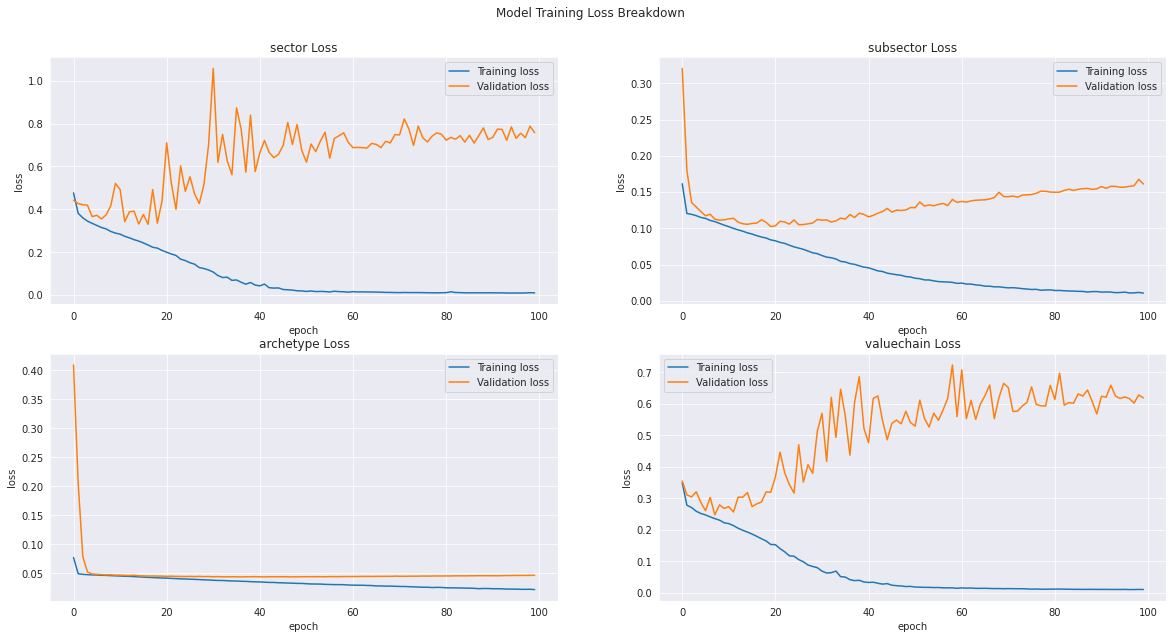

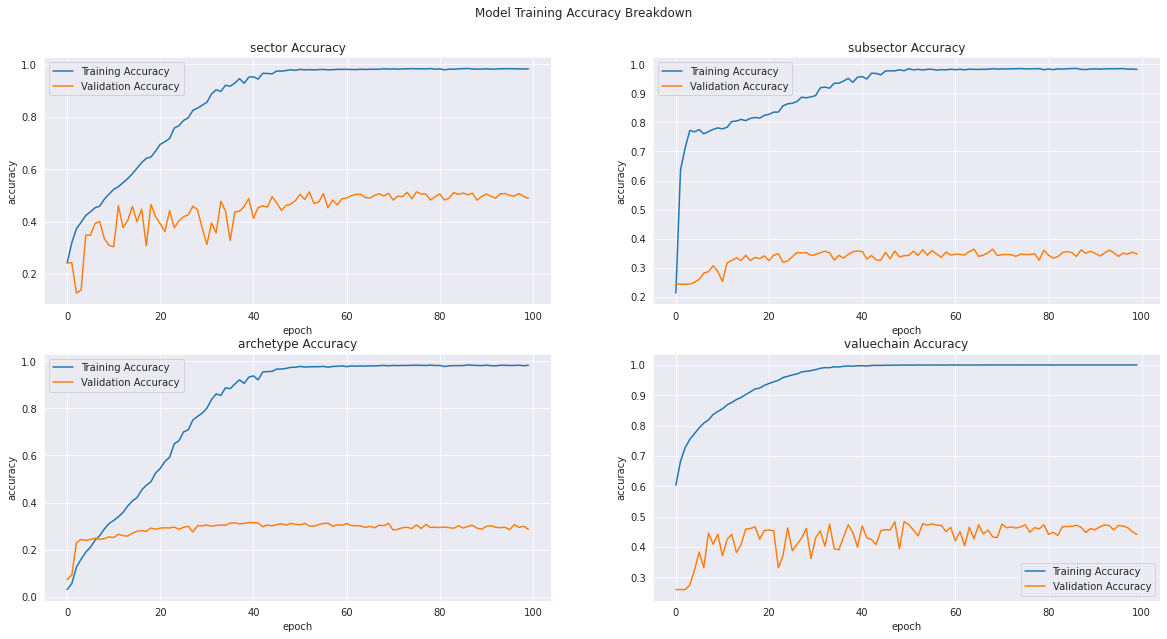

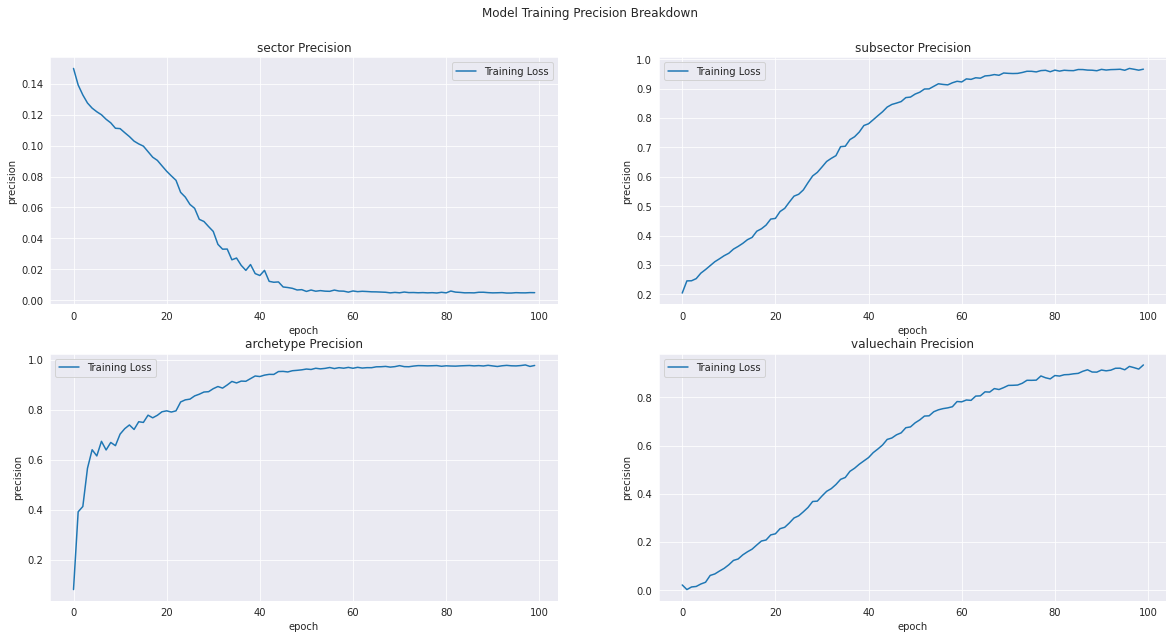

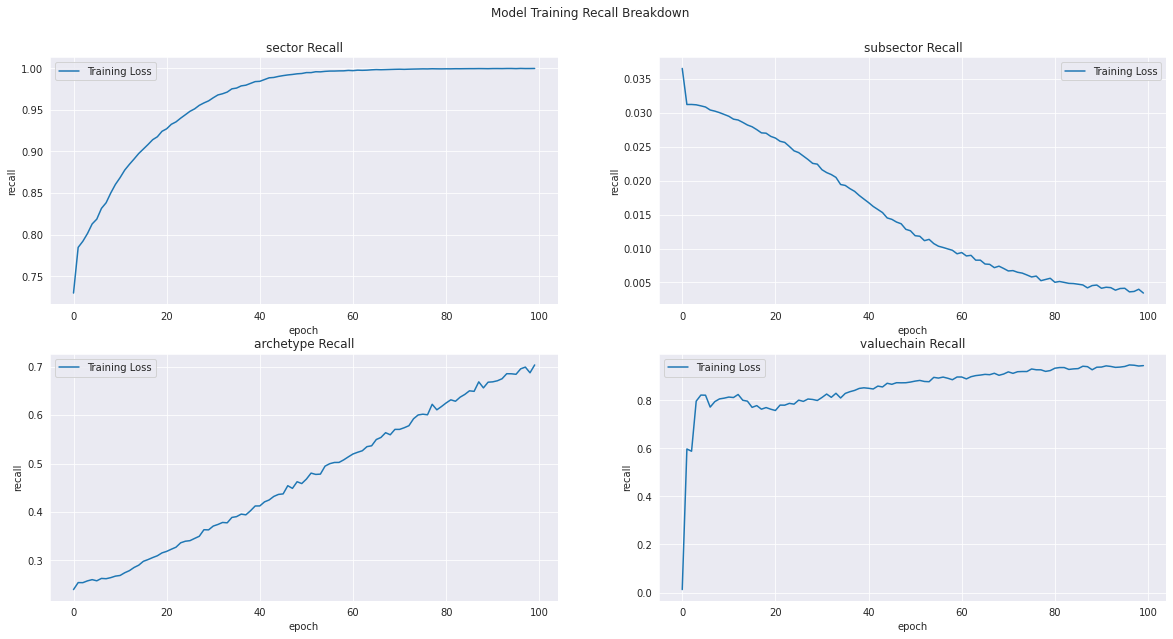

In [ ]:
# plot metric graphs for all labels
metric_names = model.metrics_names

fig = plt.figure(1, figsize=(20,10))
plt.suptitle('Model Training Loss Breakdown', y=0.95)
validation_loss = ['val_sector_loss', 'val_subsector_loss', 'val_archetype_loss', 'val_valuechain_loss']

for i, name in enumerate(label_names):
    plt.subplot(2, 2, i+1)
    plt.plot(history.history[metric_names[i+1]])
    plt.plot(history.history[validation_loss[i]])
    plt.title(f'{name} Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Training loss', 'Validation loss'])

fig = plt.figure(2, figsize=(20,10))
plt.suptitle('Model Training Accuracy Breakdown', y=0.95)
validation_acc = ['val_sector_accuracy', 'val_subsector_accuracy', 'val_archetype_accuracy', 'val_valuechain_accuracy']

for i, name in enumerate(label_names):
    plt.subplot(2, 2, i+1)
    plt.plot(history.history[metric_names[i+5]])
    plt.plot(history.history[validation_acc[i]])
    plt.title(f'{name} Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Training Accuracy', 'Validation Accuracy'])

fig = plt.figure(3, figsize=(20,10))
plt.suptitle('Model Training Precision Breakdown', y=0.95)

for i, name in enumerate(label_names):
    plt.subplot(2, 2, i+1)
    plt.plot(history.history[metric_names[i+9]])
    plt.title(f'{name} Precision')
    plt.ylabel('precision')
    plt.xlabel('epoch')
    plt.legend(['Training Loss'])

fig = plt.figure(4, figsize=(20,10))
plt.suptitle('Model Training Recall Breakdown', y=0.95)

for i, name in enumerate(label_names):
    plt.subplot(2, 2, i+1)
    plt.plot(history.history[metric_names[i+13]])
    plt.title(f'{name} Recall')
    plt.ylabel('recall')
    plt.xlabel('epoch')
    plt.legend(['Training Loss'])

plt.show()

In [ ]:
metrics = model.evaluate(X_test, y_test_multi, verbose=0)[1:]

hamming_losses = ['sector_hamming_loss', 'subsector_hamming_loss', 'archetype_hamming_loss', 'valuechain_hamming_loss']

print(f'Label\t\tLoss\tAccuracy\tPrecision\tRecall\tPR AUC\tHamming Loss')
for i, label in enumerate(label_names):
    print(f'{label:<16}{metrics[i]:<8.3f}{metrics[i+4]:<8.3%}\t{metrics[i+8]:<9.3f}\t{metrics[i+12]:<6.3f}\t{metrics[i+16]:<6.3f}\t{metrics[i+20]:6.3f}')

Label		Loss	Accuracy	Precision	Recall	PR AUC	Hamming Loss
sector          0.329   78.786% 	0.056    	0.914 	0.265 	 0.819
subsector       0.073   82.791% 	0.704    	0.015 	0.921 	 0.734
archetype       0.035   76.286% 	0.847    	0.510 	0.009 	 0.920
valuechain      0.279   92.940% 	0.654    	0.817 	0.764 	 0.048


In [ ]:
results = model.predict(X_test)

predicted_label = []
for label in results:
    predicted_label.append(np.argmax(label, axis = 1))
predicted_label = np.array(predicted_label)

for i in range(predicted_label.shape[1]):
    print(f'Expected: {y_test[i]} | got {predicted_label[:,i]}')

Expected: [ 3 23 12  3] | got [ 3 23 64  3]
Expected: [ 0 28 18  3] | got [ 2 19 64  0]
Expected: [ 4 24 64  0] | got [ 4 24 64  0]
Expected: [ 0 11 34  5] | got [ 0 11  8  5]
Expected: [ 4 24 64  0] | got [ 1 28  9  4]
Expected: [ 4 24 64  0] | got [ 4 24 64  0]
Expected: [ 1 31 88  5] | got [ 1 31 46  5]
Expected: [ 5 26 75  7] | got [ 5 26 18  7]
Expected: [ 3 25 70  8] | got [ 3 25 70  8]
Expected: [ 0 28 18  3] | got [ 0 28 18  3]
Expected: [ 5 13 33  3] | got [ 4 24 64  5]
Expected: [ 0  1 27  7] | got [ 3 28 46  3]
Expected: [ 2  2 47  4] | got [ 2  2 47  4]
Expected: [ 6 17 46  5] | got [ 6 17 46  5]
Expected: [2 2 5 6] | got [ 3 31 64  3]
Expected: [ 1  6 14  5] | got [ 1  6 14  5]
Expected: [ 4 24 64  0] | got [ 4 24 64  0]
Expected: [2 2 5 6] | got [2 2 5 6]
Expected: [ 6  8 19  5] | got [ 3  4 64  3]
Expected: [ 6  8 20  3] | got [ 6  8 20  3]
Expected: [ 6 18 49  5] | got [ 6 18 14  5]
Expected: [ 6  8 19  5] | got [ 6  8 18  5]
Expected: [ 4 24 64  0] | got [ 4 11 64  0]


---
---

# 5. Saving Models

### 5.1 Using `model.save`

---

Save the model and zip it.

In [ ]:
# save models to file
for i in range(4):
    models[i].save(f'./model_{i+1}')

INFO:tensorflow:Assets written to: ./model_1/assets
INFO:tensorflow:Assets written to: ./model_2/assets
INFO:tensorflow:Assets written to: ./model_3/assets
INFO:tensorflow:Assets written to: ./model_4/assets


In [ ]:
!zip -r model_4.zip ./model_4

  adding: model_4/ (stored 0%)
  adding: model_4/saved_model.pb (deflated 89%)
  adding: model_4/variables/ (stored 0%)
  adding: model_4/variables/variables.index (deflated 66%)
  adding: model_4/variables/variables.data-00000-of-00001 (deflated 43%)
  adding: model_4/assets/ (stored 0%)


---
---

# 6. References


## Linking GitHub Private Repo with Google Colab
---
1. [How to clone private Github repo from Google Colab using SSH](https://medium.com/@purba0101/how-to-clone-private-github-repo-in-google-colab-using-ssh-77384cfef18f)
2. [Adding a new SSH key to your GitHub account](https://docs.github.com/en/github/authenticating-to-github/adding-a-new-ssh-key-to-your-github-account)


## How to classify text with NLTK
---
1. [Learning to Classify Text](https://www.nltk.org/book/ch06.html)


## Other references
---
1. [Print very long string completely in pandas dataframe](https://stackoverflow.com/questions/29902714/print-very-long-string-completely-in-pandas-dataframe)
2. [Removing newlines from messy strings in pandas dataframe cells?
](https://stackoverflow.com/questions/44227748/removing-newlines-from-messy-strings-in-pandas-dataframe-cells)
3. [Tokenizing using Pandas and spaCy](https://stackoverflow.com/questions/46981137/tokenizing-using-pandas-and-spacy)
4. [Intro to NLP with spaCy](https://nicschrading.com/project/Intro-to-NLP-with-spaCy/)
5. [A short introduction to NLP in Python with spaCy](https://towardsdatascience.com/a-short-introduction-to-nlp-in-python-with-spacy-d0aa819af3ad)
6. [Punctuation, stopwords and lemmatization with spacy](https://stackoverflow.com/questions/57747613/punctuation-stopwords-and-lemmatization-with-spacy)

